In [1]:
#
#For reproducibility 
#%load_ext watermark
#%watermark -v -n -m -p numpy,scipy,sklearn,pandas
%load_ext autoreload
%autoreload 2

In [100]:
%matplotlib inline
import warnings 
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import os
PROJ_ROOT = os.path.abspath(os.path.join("../"+os.pardir))
print(PROJ_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))

# My imports  
from data.preprocess import *
from visualization.exploratory import exploratory_visualization

/Users/rohannuttall/Desktop/rohan/etalab/deep-buildings


In [102]:
df_name = os.path.join(PROJ_ROOT, 'data', 'interim', 'CIRS_data_joined_LSTM.pkl')
df = pd.read_pickle(df_name)

In [104]:
regr_vars = ['hum_ratio','hours','solar_radiation','temp','wind_dir','windspeed','L3S_Office_1']
target = 'indoorTemp'
df  = preprocess_data(df, regr_vars, target)


In [105]:
df.head()

,hum_ratio,hours,solar_radiation,temp,wind_dir,windspeed,L3S_Office_1,target_data
2013-08-22 00:00:00,0.009164,0,0.0,19.566667,90.00,2.64,1.0,26.07
2013-08-22 01:00:00,0.009358,1,0.0,19.550000,67.50,1.89,1.0,25.85
2013-08-22 02:00:00,0.009094,2,0.0,19.275000,67.50,1.08,1.0,25.85
2013-08-22 03:00:00,0.008807,3,0.0,18.825000,258.75,4.77,1.0,25.64
2013-08-22 04:00:00,0.008785,4,0.0,18.850000,303.75,4.32,1.0,25.42


In [106]:
CorrMatrix=pd.DataFrame(df[X.index.month==7].corr()['target_data'])
print(CorrMatrix.sort_values(by=['target_data']))

                 target_data
windspeed           0.032843
L3S_Office_1        0.087448
solar_radiation     0.211818
wind_dir            0.367273
hours               0.386904
hum_ratio           0.442037
temp                0.708854
target_data         1.000000


In [108]:
list(df.columns)

['hum_ratio',
 'hours',
 'solar_radiation',
 'temp',
 'wind_dir',
 'windspeed',
 'L3S_Office_1',
 'target_data']

In [109]:
# My imports  
from modeling.LSTM.model import Model
from modeling.LSTM.get_data import generate_data, split_train_test

In [111]:
    
#    multiplier = [1,-777,-999,-999,-999,-999,-999]
#    
#    look_back = [2,3,1,2,1,0,0]
#    #look_back = [1,1,1,1,1,0,0]
#               # Values above must be integers. Determines how many previous days of data of each variable are 
#               # including in the training/testing variable set
#    look_ahead = [0,0,0,0,0,0,0]
#               # Same as above, albeit for future days
hist_keys = ['hum_ratio','hours','solar_radiation','temp','wind_dir', 'windspeed','L3S_Office_1']
regr_vars = ['hum_ratio','hours','solar_radiation','temp','wind_dir', 'windspeed','L3S_Office_1']

X, y= generate_data(df, freq='D', regr_vars=regr_vars, hist_keys = hist_keys, hist_steps=2)

                        target_data
next_hours_1              -0.017790
hours                     -0.017422
windspeed                  0.044862
next_windspeed_1           0.075202
next_wind_dir_1            0.183445
wind_dir                   0.401423
next_L3S_Office_1_1        0.433247
next_solar_radiation_1     0.460131
L3S_Office_1               0.522597
next_hum_ratio_1           0.571164
next_temp_1                0.591390
solar_radiation            0.621824
hum_ratio                  0.646785
temp                       0.744621
target_data                1.000000


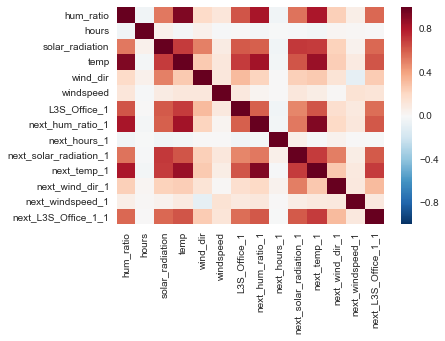

In [112]:
# Print correlation values to help hint at what regression parameters to choose
%matplotlib inline
import seaborn as sns
sns.heatmap(Xp.corr())
CorrMatrix=pd.DataFrame(Xp.join(yp).corr()['target_data'])
print(CorrMatrix.sort_values(by=['target_data']))

In [113]:
trainX, trainY, testX, testY = split_train_test(X, y, test_year=2016)

Train Start Date:  2013-08-24 00:00:00
Train Stop Date:   2017-08-14 00:00:00
Test Start Date:   2016-07-01 00:00:00
Test Start Date:   2016-09-30 00:00:00


In [27]:
# the save data function for LSTM needs to be after the 'create_dataset' function

In [81]:
model = Model(dict(features=5, forecast_horizon=1)).cuda()
model.batch_train(trainX, trainY, n_epochs=450, lr=0.0005)

AssertionError: Torch not compiled with CUDA enabled

In [82]:
!pwd

/Users/rohannuttall/Desktop/rohan/etalab/deep-buildings/notebooks/eda


In [92]:
def save(fname):
    import pickle
    fname = time.strftime("%Y%m%d-%H%M%S") + '_'+fname
    path = os.path.join(PROJ_ROOT, 'models', 'LSTM', fname)
    with open(path, 'wb') as outfile:
        pickle.dump(trainX, outfile, pickle.HIGHEST_PROTOCOL)

In [93]:
save('test')

In [95]:
os.path.join('models', 'LSTM', fname)

'models/LSTM/20190829-152426_fredd'

In [96]:
import sys

In [99]:
print(sys.path('../../../models/LSTM'))

TypeError: 'list' object is not callable